# 📊 Customer Churn Predictive Modeling

## Step 1: Data Preparation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
file_path = "C:/DataCapstone/customer-behavior-ecommerce/data/Processed/featured_customers.csv"
df = pd.read_csv(file_path)
df.head()

# Select features and target
features = ['purchase_frequency', 'days_since_last_purchase']
X = df[features]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 2: Model Selection


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
svc = SVC()

# (We'll train and evaluate them in the next step)


## Step 3: Training and Evaluation


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate Logistic Regression
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate Random Forest
rf.fit(X_train, y_train)  # RF does not require scaling
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))



c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DataCapstone\customer-behavior-ecommerce\churn_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000

Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     40016
           1       0.57      0.11      0.19      9984

    accuracy                           0.81     50000
   macro avg       0.70      0.55      0.54     50000
weighted avg       0.77      0.81      0.75     50000



## Step 4: Pipeline and Result Export

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create and fit pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [24]:
import joblib
joblib.dump(pipeline, "C:/DataCapstone/customer-behavior-ecommerce/data/Processed/logistic_pipeline.pkl")


['C:/DataCapstone/customer-behavior-ecommerce/data/Processed/logistic_pipeline.pkl']

### Confusion Matrix (Heatmap)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Retain", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


NameError: name 'y_pred' is not defined

### Classification Report (as a visual table)

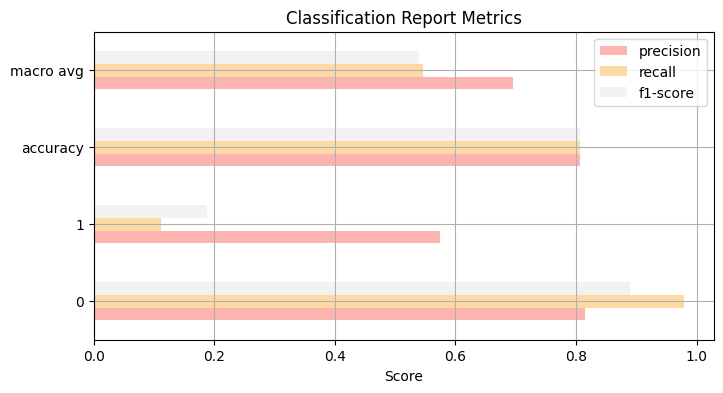

In [32]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Optional: Plot precision, recall, f1-score
report_df.iloc[:-1, :-1].plot(kind='barh', figsize=(8, 4), colormap='Pastel1')
plt.title("Classification Report Metrics")
plt.xlabel("Score")
plt.grid(True)
plt.show()


### ROC Curve

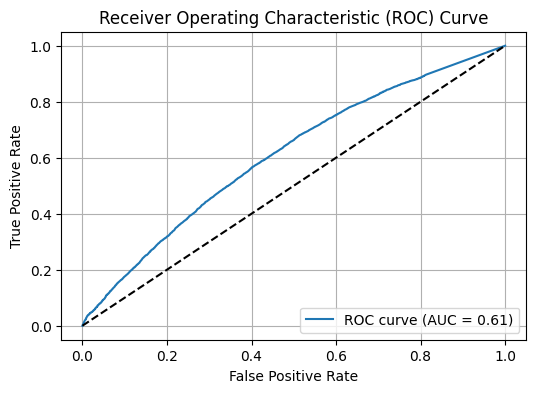

In [33]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = model.named_steps['classifier'].coef_[0]
features = X.columns  # Replace with actual feature names if not using a DataFrame

# Create a barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients, y=features, palette="pastel")
plt.title("Feature Importance (Logistic Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()

# Save the plot
plt.savefig("C:/DataCapstone/customer-behavior-ecommerce/reports/feature_importance.png")
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'named_steps'